# NLP Introduction

In this tutorial, I introduce some terminologies in Natural Language Processing (NLP) field. First, we will go through some traditional NLP methods before Deep Learning to have a brief view of history of NLP. In the next notebook, we will improve our models by using knowledge in Deep Learning or Sequence Model.

This notebook covers following topics:
- Corpora, Tokens and Types
- TF-IDF
- Unigrams, Bigrams, Trigrams, ..., N-grams
- Lemmas and Stems
- Categorizing Sentences and Documents:
    - Categorizing words: part-of-specch (POS) taging
    - Categorizing Spans: Chunking and Named Entity Regconition

**Remark**: install `spacy` and `nltk` packages for preprocessing text. Documentation for [spaCy](https://spacy.io/) and [nltk](https://www.nltk.org/)
    
I use an example with **Yelp Review Dataset** using Multi Layer Perceptron, a traditional approach for NLP tasks.

>In 2015, Yelp held a contest in which it asked participants to predict the rating of a restaurant given its
review. Zhang, Zhao, and Lecun (2015) simplified the dataset by converting the 1­ and 2­star ratings
into a “negative” sentiment class and the 3­ and 4­star ratings into a “positive” sentiment class, and
split it into 560,000 training samples and 38,000 testing samples. In this example we use the simplified
Yelp dataset, with two minor differences. In the remainder of this section, we describe the process by
which we minimally clean the data and derive our final dataset. Then, we outline the implementation
that utilizes PyTorch’s Dataset class

# Corpora, Tokens and Types

* **Corpora**: a text dataset, which contains raw text (in ASCII or UTF-8), and any meta data associated with the text.
* **Meta data**: Auxiliary information associated with the text.
* **Tokens**: raw text is a sequence of characters which are grouped into contiguous units called *tokens*. The process of breaking down a text into tokens called **tokenizer**.
* **Types** are unique tokens present in a corpus.
* Set of all types in a corpus is its **vocabulary**.

In [1]:
import spacy

tokenizer = spacy.load("en_core_web_sm")
# text = "Mary, I haven't seen her self-esteem!"
text = "What's happened to me? he thought. It wasn't a dream."
tokenized = [str(token) for token in tokenizer(text.lower())]
print(tokenized)

['what', "'s", 'happened', 'to', 'me', '?', 'he', 'thought', '.', 'it', 'was', "n't", 'a', 'dream', '.']


In [4]:
from nltk.tokenize import TweetTokenizer

tweet = "Will be interviewed by @seanhannity tonight at 9:00 P.M. on @FoxNews. Enjoy #ILoveNLP!!!"
tweet_tokenizer = TweetTokenizer()
print(tweet_tokenizer.tokenize(tweet.lower()))

['will', 'be', 'interviewed', 'by', '@seanhannity', 'tonight', 'at', '9:00', 'p', '.', 'm', '.', 'on', '@foxnews', '.', 'enjoy', '#ilovenlp', '!', '!', '!']


# TF-IDF


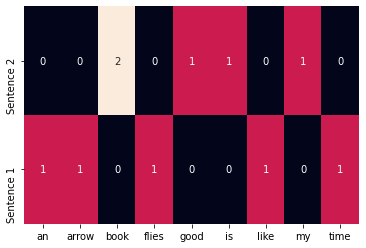

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import string

corpus = [
    'My book is a good book.',
    'Time flies like an arrow.'
]

one_hot_vectorizer = CountVectorizer(binary=False)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()

# Plot TF prepresentation
vocab = sorted(one_hot_vectorizer.vocabulary_)
sns.heatmap(
    one_hot, annot=True, cbar=False,
    xticklabels=vocab, 
    yticklabels=['Sentence 2', 'Sentence 1']
)

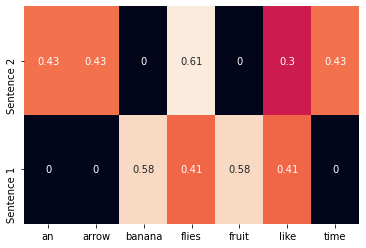

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import string

corpus = [
    'Time flies flies like an arrow.',
    'Fruit flies like a banana.'
]

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
vocab = sorted(tfidf_vectorizer.vocabulary_)

# Plot TF prepresentation

sns.heatmap(
    tfidf, annot=True, cbar=False,
    xticklabels=vocab, 
    yticklabels=['Sentence 2', 'Sentence 1']
)

# Unigrams, Bigrams, Trigrams, ..., N-grams

**N-grams** are fixed-length consecutive token sequences occuring in the text

In [8]:
from nltk import ngrams

trigrams = ngrams(tokenized, 4)
print('Before tri-grams')
print(tokenized)
print('After tri-grams')
for grams in trigrams:
    print(grams)

Before tri-grams
['what', "'s", 'happened', 'to', 'me', '?', 'he', 'thought', '.', 'it', 'was', "n't", 'a', 'dream', '.']
After tri-grams
('what', "'s", 'happened', 'to')
("'s", 'happened', 'to', 'me')
('happened', 'to', 'me', '?')
('to', 'me', '?', 'he')
('me', '?', 'he', 'thought')
('?', 'he', 'thought', '.')
('he', 'thought', '.', 'it')
('thought', '.', 'it', 'was')
('.', 'it', 'was', "n't")
('it', 'was', "n't", 'a')
('was', "n't", 'a', 'dream')
("n't", 'a', 'dream', '.')


**Lemmas** are root form of words. For example, word *fly* can be inflected into many words: *flow, flew, flies, flown, flowing*. *Fly* is the lemma for all these different words.

In [9]:
doc = tokenizer("he haven't been playing tennis")
for token in doc:
    print(f"{token} -> {token.lemma_}")

he -> -PRON-
have -> have
n't -> not
been -> be
playing -> play
tennis -> tennis


# Categorizing sentences and documents

**Part-of-speech (POS)** tagging

In [27]:
doc = tokenizer("The clear blue sky is collapsing.")
for token in doc:
    print(f"{token} - {token.pos_}")

The - DET
clear - ADJ
blue - ADJ
sky - NOUN
is - AUX
collapsing - VERB
. - PUNCT


**Noun phrash (NP) chunkings**

In [14]:
doc = tokenizer("The police caught the criminal quickly")
for chunk in doc.noun_chunks:
    print(f"{chunk} - {chunk.label_}")

The police - NP
the criminal - NP
